<a href="https://colab.research.google.com/github/sainiankur63/Master_Modular_project/blob/main/Notebook_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Installing required Libraries** 

In [1]:
!pip install pandas numpy pandas matplotlib seaborn opendatasets --quiet

**Importing Libraries**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Download the Dataset**

In [3]:
import opendatasets as od
dataset_url = 'https://www.kaggle.com/austinreese/craigslist-carstrucks-data'

In [4]:
%%time
od.download(dataset_url)

100%|██████████| 262M/262M [00:01<00:00, 177MB/s]



CPU times: user 11.1 s, sys: 3.12 s, total: 14.2 s
Wall time: 20.1 s


In [5]:
data_dir = './craigslist-carstrucks-data'

**View Dataset Files**

In [6]:
# List of files with size
!ls -lh {data_dir}

total 1.4G
-rw-r--r-- 1 root root 1.4G Mar 29 12:24 vehicles.csv


In [7]:
# view dataset
!head {data_dir}/vehicles.csv

id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date
7222695916,https://prescott.craigslist.org/cto/d/prescott-2010-ford-ranger/7222695916.html,prescott,https://prescott.craigslist.org,6000,,,,,,,,,,,,,,,,,,az,,,
7218891961,https://fayar.craigslist.org/ctd/d/bentonville-2017-hyundai-elantra-se/7218891961.html,fayetteville,https://fayar.craigslist.org,11900,,,,,,,,,,,,,,,,,,ar,,,
7221797935,https://keys.craigslist.org/cto/d/summerland-key-2005-excursion/7221797935.html,florida keys,https://keys.craigslist.org,21000,,,,,,,,,,,,,,,,,,fl,,,
7222270760,https://worcester.craigslist.org/cto/d/west-brookfield-2002-honda-odyssey-ex/7222270760.html,worcester / central MA,https://worcester.craigslist.org,1500,,,,,,,,,,,,,,,,,,ma,,,
7210384030,https://greensboro.craigslist.org/cto/d/trinity-1965-chevrolet-truck/7210384030.html,greensboro,https://gre

In [8]:
# checking No. of lines in dataset
!wc -l {data_dir}/vehicles.csv

426881 ./craigslist-carstrucks-data/vehicles.csv


In [9]:
# checking No. of labels  in the dataset
!head -n 1 {data_dir}/vehicles.csv

id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,county,state,lat,long,posting_date


Observations:

- This is a supervised learning regression problem
- Dataset is 1.4 GB in size
- Dataset contains 426881 rows and 
- The dataset has 26 columns:
  - 'id'
  - 'url'
  - 'region'
  - 'region_url'
  - 'price'
  - 'year'
  - 'manufacturer'
  - 'model'
  - 'condition'
  - 'cylinders'
  - 'fuel'
  - 'odometer'
  - 'title_status'
  - 'transmission'
  - 'VIN'
  - 'drive'
  - 'size'
  - 'type'
  - 'paint_color'
  - 'image_url'
  - 'description'
  - 'county'
  - 'state'
  - 'lat'
  - 'long' 
  - 'posting_date'




### Loading Dataset for Analysis

Loading the entire dataset into Pandas is going to be slow, so we can use the following optimizations:

- Work with a 10% sample of the data (~42
k rows)


In [10]:
import random

In [11]:
# Taking 10 percent fraction of the dataset
sample_frac = 0.3

In [12]:
%%time

def skip_row(row_idx):
    if row_idx == 0:
        return False
    return random.random() > sample_frac

random.seed(42)
df = pd.read_csv(data_dir+"/vehicles.csv", 
                 skiprows=skip_row)

CPU times: user 17.4 s, sys: 2.1 s, total: 19.5 s
Wall time: 23.2 s


In [13]:
# Shape of the dataset
df.shape

(128009, 26)

In [14]:
# checking the number of null values and the datatypes of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128009 entries, 0 to 128008
Data columns (total 26 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            128009 non-null  int64  
 1   url           128009 non-null  object 
 2   region        128009 non-null  object 
 3   region_url    128009 non-null  object 
 4   price         128009 non-null  int64  
 5   year          127635 non-null  float64
 6   manufacturer  122720 non-null  object 
 7   model         126444 non-null  object 
 8   condition     75937 non-null   object 
 9   cylinders     74745 non-null   object 
 10  fuel          127127 non-null  object 
 11  odometer      126702 non-null  float64
 12  title_status  125510 non-null  object 
 13  transmission  127208 non-null  object 
 14  VIN           79618 non-null   object 
 15  drive         88775 non-null   object 
 16  size          36177 non-null   object 
 17  type          100057 non-null  object 
 18  pain

In [15]:
# county column has all null values,so dropping this column
df = df.drop('county',axis =1)

In [16]:
# To show all columns' names on a large pandas dataframe

pd.set_option('display.max_columns', None)

In [17]:
df.head(10)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
0,7218891961,https://fayar.craigslist.org/ctd/d/bentonville...,fayetteville,https://fayar.craigslist.org,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar,NaN,NaN,NaN
1,7221797935,https://keys.craigslist.org/cto/d/summerland-k...,florida keys,https://keys.craigslist.org,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl,NaN,NaN,NaN
2,7222270760,https://worcester.craigslist.org/cto/d/west-br...,worcester / central MA,https://worcester.craigslist.org,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma,NaN,NaN,NaN
3,7220195662,https://hudsonvalley.craigslist.org/cto/d/poug...,hudson valley,https://hudsonvalley.craigslist.org,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny,NaN,NaN,NaN
4,7219485069,https://erie.craigslist.org/cto/d/erie-2012-su...,erie,https://erie.craigslist.org,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa,NaN,NaN,NaN
5,7218893038,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
6,7217788283,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
7,7217147606,https://elpaso.craigslist.org/ctd/d/el-paso-20...,el paso,https://elpaso.craigslist.org,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,tx,NaN,NaN,NaN
8,7222753076,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,24999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN
9,7218423006,https://bellingham.craigslist.org/ctd/d/bellin...,bellingham,https://bellingham.craigslist.org,11999,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,wa,NaN,NaN,NaN


In [18]:
[ features for features in df.columns if df[features].isnull().sum() > 0 ]

['year',
 'manufacturer',
 'model',
 'condition',
 'cylinders',
 'fuel',
 'odometer',
 'title_status',
 'transmission',
 'VIN',
 'drive',
 'size',
 'type',
 'paint_color',
 'image_url',
 'description',
 'lat',
 'long',
 'posting_date']

In [19]:
# Dropping  colums which contains null value together
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128009 entries, 0 to 128008
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            128009 non-null  int64  
 1   url           128009 non-null  object 
 2   region        128009 non-null  object 
 3   region_url    128009 non-null  object 
 4   price         128009 non-null  int64  
 5   year          127635 non-null  float64
 6   manufacturer  122720 non-null  object 
 7   model         126444 non-null  object 
 8   condition     75937 non-null   object 
 9   cylinders     74745 non-null   object 
 10  fuel          127127 non-null  object 
 11  odometer      126702 non-null  float64
 12  title_status  125510 non-null  object 
 13  transmission  127208 non-null  object 
 14  VIN           79618 non-null   object 
 15  drive         88775 non-null   object 
 16  size          36177 non-null   object 
 17  type          100057 non-null  object 
 18  pain

In [20]:
# Missing & df['size'].isnull()
Missing_rows = df.loc[df.year.isnull() & df.manufacturer.isnull() & df.model.isnull() & df.condition.isnull() & df.cylinders.isnull() & df.fuel.isnull() 
               & df.odometer.isnull() & df.title_status.isnull() & df.transmission.isnull() & df.VIN.isnull() & df.drive.isnull() 
               & df.type.isnull() & df.paint_color.isnull() & df.image_url.isnull() & df.description.isnull() & df.posting_date.isnull() & df.lat.isnull()
               & df.long.isnull() & df.posting_date.isnull()]

In [21]:
len(Missing_rows)

26

In [22]:
# 12 such rows where null values are present. Dropping these rows

for i in Missing_rows['id']:
  df.drop(df[df['id'] == i ].index, inplace=True)

In [23]:
df.shape

(127983, 25)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127983 entries, 12 to 128008
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            127983 non-null  int64  
 1   url           127983 non-null  object 
 2   region        127983 non-null  object 
 3   region_url    127983 non-null  object 
 4   price         127983 non-null  int64  
 5   year          127635 non-null  float64
 6   manufacturer  122720 non-null  object 
 7   model         126444 non-null  object 
 8   condition     75937 non-null   object 
 9   cylinders     74745 non-null   object 
 10  fuel          127127 non-null  object 
 11  odometer      126702 non-null  float64
 12  title_status  125510 non-null  object 
 13  transmission  127208 non-null  object 
 14  VIN           79618 non-null   object 
 15  drive         88775 non-null   object 
 16  size          36177 non-null   object 
 17  type          100057 non-null  object 
 18  pai

In [25]:
df.head(4)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
12,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04T12:31:18-0500
13,7315715960,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-02T08:44:35-0500
14,7315379459,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,37990,2016.0,chevrolet,camaro ss coupe 2d,good,8 cylinders,gas,9704.0,clean,other,1G1FF1R79G0140582,rwd,NaN,coupe,red,https://images.craigslist.org/00i0i_5fpVmidrep...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-01T12:21:51-0500
15,7315275975,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,NaN,other,55251.0,clean,other,5TFEY5F15EX169621,NaN,NaN,pickup,red,https://images.craigslist.org/00Q0Q_lVfMOkbtUO...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-01T09:21:37-0500


## 2. Explore the Dataset
    - Numeric columns : [id , price ,year , odometer , lat , long ]
    - Char columns : [url, region, region_url, manufacturer, model,condition, cylinders, fuel, title_status, transmission,VIN, drive, size,
                      type, paint_color, image_url,description, state, posting_date ]

In [26]:
df.describe()

,id,price,year,odometer,lat,long
count,1.279830e+05,1.279830e+05,127635.000000,1.267020e+05,126023.000000,126023.000000
mean,7.311491e+09,7.428014e+04,2011.251514,9.752461e+04,38.484848,-94.700116
std,4.380653e+06,1.345474e+07,9.403292,1.983542e+05,5.836677,18.337693
min,7.301584e+09,0.000000e+00,1900.000000,0.000000e+00,-74.176076,-159.590001
25%,7.308142e+09,5.900000e+03,2008.000000,3.744200e+04,34.617950,-111.939783
50%,7.312599e+09,1.395000e+04,2013.000000,8.531000e+04,39.155200,-88.360000
75%,7.315252e+09,2.600000e+04,2017.000000,1.336945e+05,42.389900,-80.830000
max,7.317098e+09,3.736929e+09,2022.000000,1.000000e+07,64.993698,173.885502


**Observations:**
   - Year  : The lowest model of car 1900 and highest 2022
   - odometer : min 0 , avg 98043 and max 10000000
   - price : min 0 and max 3736928711


In [27]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'condition', 'cylinders', 'fuel', 'odometer', 'title_status',
       'transmission', 'VIN', 'drive', 'size', 'type', 'paint_color',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date'],
      dtype='object')

In [28]:
df.head(2)

,id,url,region,region_url,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,image_url,description,state,lat,long,posting_date
12,7316814884,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,3GTP1VEC4EG551563,NaN,NaN,pickup,white,https://images.craigslist.org/00R0R_lwWjXSEWNa...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-04T12:31:18-0500
13,7315715960,https://auburn.craigslist.org/ctd/d/auburn-uni...,auburn,https://auburn.craigslist.org,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,5TFTX4CN3EX042751,NaN,NaN,pickup,red,https://images.craigslist.org/00X0X_1cMDo5xqSu...,Carvana is the safer way to buy a car During t...,al,32.59,-85.48,2021-05-02T08:44:35-0500


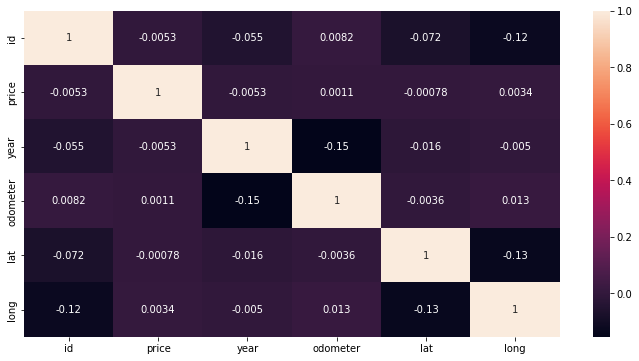

In [29]:
# correlation
corrMatrix = df.corr()

plt.figure(figsize=(12,6))
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [30]:
# dropping the duplicate data
df.drop_duplicates(inplace = True)
df.shape

(127983, 25)

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127983 entries, 12 to 128008
Data columns (total 25 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            127983 non-null  int64  
 1   url           127983 non-null  object 
 2   region        127983 non-null  object 
 3   region_url    127983 non-null  object 
 4   price         127983 non-null  int64  
 5   year          127635 non-null  float64
 6   manufacturer  122720 non-null  object 
 7   model         126444 non-null  object 
 8   condition     75937 non-null   object 
 9   cylinders     74745 non-null   object 
 10  fuel          127127 non-null  object 
 11  odometer      126702 non-null  float64
 12  title_status  125510 non-null  object 
 13  transmission  127208 non-null  object 
 14  VIN           79618 non-null   object 
 15  drive         88775 non-null   object 
 16  size          36177 non-null   object 
 17  type          100057 non-null  object 
 18  pai

In [32]:
 # Data cleaning: First step for data cleaning was to remove unnecessary features.
 df = df.drop(['id','region','url','region_url','region_url','VIN','image_url','description','state', 'lat', 'long','posting_date'],axis=1)

In [33]:
df.head()

,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,drive,size,type,paint_color
12,33590,2014.0,gmc,sierra 1500 crew cab slt,good,8 cylinders,gas,57923.0,clean,other,NaN,NaN,pickup,white
13,27990,2014.0,toyota,tacoma access cab pickup,good,NaN,other,17805.0,clean,other,NaN,NaN,pickup,red
14,37990,2016.0,chevrolet,camaro ss coupe 2d,good,8 cylinders,gas,9704.0,clean,other,rwd,NaN,coupe,red
15,33590,2014.0,toyota,tundra crewmax sr5 pickup,good,NaN,other,55251.0,clean,other,NaN,NaN,pickup,red
16,30990,2019.0,ford,ranger supercrew xl pickup,good,NaN,other,1834.0,clean,other,NaN,NaN,pickup,black


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127983 entries, 12 to 128008
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         127983 non-null  int64  
 1   year          127635 non-null  float64
 2   manufacturer  122720 non-null  object 
 3   model         126444 non-null  object 
 4   condition     75937 non-null   object 
 5   cylinders     74745 non-null   object 
 6   fuel          127127 non-null  object 
 7   odometer      126702 non-null  float64
 8   title_status  125510 non-null  object 
 9   transmission  127208 non-null  object 
 10  drive         88775 non-null   object 
 11  size          36177 non-null   object 
 12  type          100057 non-null  object 
 13  paint_color   88978 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 14.6+ MB


In [35]:
print(len(df.year.unique()))
print(df.year.value_counts())
df.year.isnull().sum()

105
2017.0    10927
2018.0    10906
2015.0     9550
2013.0     9276
2014.0     9036
          ...  
1920.0        1
1944.0        1
1910.0        1
1916.0        1
1925.0        1
Name: year, Length: 104, dtype: int64


348

In [36]:
print(df.manufacturer.unique())
print(len(df.manufacturer.unique()))
df.manufacturer.isnull().sum()

['gmc' 'toyota' 'chevrolet' 'ford' 'nissan' 'jeep' 'ram' 'mazda' 'lexus'
 'volvo' 'alfa-romeo' 'hyundai' 'lincoln' 'audi' 'acura' 'chrysler' nan
 'jaguar' 'subaru' 'kia' 'buick' 'mercedes-benz' 'bmw' 'honda'
 'volkswagen' 'porsche' 'cadillac' 'dodge' 'mini' 'pontiac' 'infiniti'
 'rover' 'mercury' 'mitsubishi' 'tesla' 'saturn' 'fiat' 'harley-davidson'
 'ferrari' 'datsun' 'aston-martin' 'land rover' 'morgan']
43


5263

In [37]:
print(df.model.unique())
print(len(df.model.unique()))
df.model.isnull().sum()

['sierra 1500 crew cab slt' 'tacoma access cab pickup'
 'camaro ss coupe 2d' ... 'cj 3a willys' 'rx& gls sport' 'gand wagoneer']
15823


1539

In [38]:
print(df.condition.unique())
print(len(df.condition.unique()))
df.condition.isnull().sum()

['good' 'excellent' 'like new' nan 'fair' 'salvage' 'new']
7


52046

In [39]:
print(df.cylinders.unique())
print(len(df.cylinders.unique()))
df.cylinders.isnull().sum()

['8 cylinders' nan '6 cylinders' '4 cylinders' '5 cylinders' 'other'
 '10 cylinders' '3 cylinders' '12 cylinders']
9


53238

In [40]:
print(df.fuel.unique())
print(len(df.fuel.unique()))
df.fuel.isnull().sum()

['gas' 'other' 'diesel' nan 'hybrid' 'electric']
6


856

In [41]:
print(df.odometer.unique())
print(len(df.odometer.unique()))
df.odometer.isnull().sum()

[ 57923.  17805.   9704. ... 199090. 114400.  34239.]
53199


1281

In [42]:
print(df.title_status.unique())
print(len(df.title_status.unique()))
df.title_status.isnull().sum()

['clean' 'lien' 'rebuilt' nan 'salvage' 'missing' 'parts only']
7


2473

In [43]:
print(df.transmission.unique())
print(len(df.transmission.unique()))
df.transmission.isnull().sum()

['other' 'automatic' 'manual' nan]
4


775

In [44]:
print(df.drive.unique())
print(len(df.drive.unique()))
df.drive.isnull().sum()

[nan 'rwd' '4wd' 'fwd']
4


39208

In [45]:
print(df['size'].unique())
print(len(df['size'].unique()))
df['size'].isnull().sum()

[nan 'full-size' 'compact' 'mid-size' 'sub-compact']
5


91806

In [46]:
print(df['type'].unique())
print(len(df['type'].unique()))
df['type'].isnull().sum()

['pickup' 'coupe' 'SUV' 'other' 'hatchback' 'sedan' 'offroad' 'van'
 'truck' nan 'wagon' 'bus' 'convertible' 'mini-van']
14


27926

In [47]:
print(df['paint_color'].unique())
print(len(df['paint_color'].unique()))
df['paint_color'].isnull().sum()

['white' 'red' 'black' 'silver' nan 'yellow' 'blue' 'grey' 'green' 'brown'
 'orange' 'custom' 'purple']
13


39005

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127983 entries, 12 to 128008
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   price         127983 non-null  int64  
 1   year          127635 non-null  float64
 2   manufacturer  122720 non-null  object 
 3   model         126444 non-null  object 
 4   condition     75937 non-null   object 
 5   cylinders     74745 non-null   object 
 6   fuel          127127 non-null  object 
 7   odometer      126702 non-null  float64
 8   title_status  125510 non-null  object 
 9   transmission  127208 non-null  object 
 10  drive         88775 non-null   object 
 11  size          36177 non-null   object 
 12  type          100057 non-null  object 
 13  paint_color   88978 non-null   object 
dtypes: float64(2), int64(1), object(11)
memory usage: 14.6+ MB


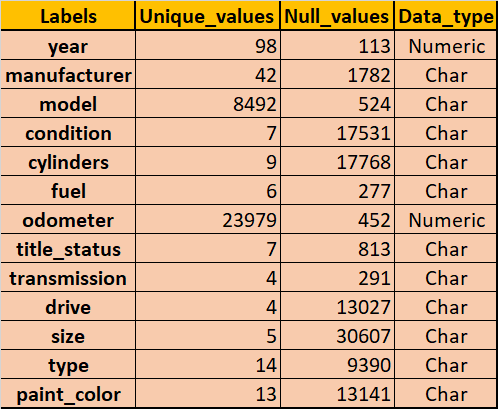


In [49]:
# Calculate the missing percentage of Null values in data
df.isna().sum().sort_values(ascending=False)/len(df)

size            0.717330
cylinders       0.415977
condition       0.406663
drive           0.306353
paint_color     0.304767
type            0.218201
manufacturer    0.041123
title_status    0.019323
model           0.012025
odometer        0.010009
fuel            0.006688
transmission    0.006055
year            0.002719
price           0.000000
dtype: float64

In [50]:
# Removing the missing percentages greater than zero.
missing_percentages =df.isna().sum().sort_values(ascending=False)/len(df) 
missing_percentages[missing_percentages!=0]

size            0.717330
cylinders       0.415977
condition       0.406663
drive           0.306353
paint_color     0.304767
type            0.218201
manufacturer    0.041123
title_status    0.019323
model           0.012025
odometer        0.010009
fuel            0.006688
transmission    0.006055
year            0.002719
dtype: float64

Text(0, 0.5, 'Features')

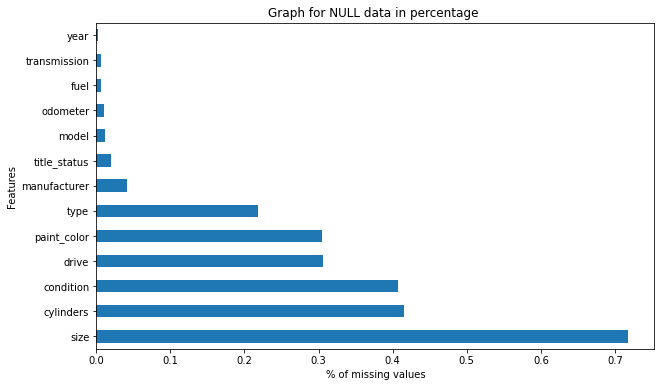

In [51]:
# Plot a graph to check missing percentages 
plt.figure(figsize=(10,6))
missing_percentages[missing_percentages!=0].plot(kind='barh')
plt.title("Graph for NULL data in percentage ")
plt.xlabel("% of missing values")
plt.ylabel("Features")

Findings from the above data

*   It is clearly seen that size column contains approx 71% of null values which
needs to be remove.
*   For now, dropping columns which contains more than 25 percent null values.

Dropping columns such as size,cylinder,condition,paint_color and drive 




In [52]:
df = df.drop(['size','cylinders','condition','paint_color','drive'],axis =1)
df.head()

,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type
12,33590,2014.0,gmc,sierra 1500 crew cab slt,gas,57923.0,clean,other,pickup
13,27990,2014.0,toyota,tacoma access cab pickup,other,17805.0,clean,other,pickup
14,37990,2016.0,chevrolet,camaro ss coupe 2d,gas,9704.0,clean,other,coupe
15,33590,2014.0,toyota,tundra crewmax sr5 pickup,other,55251.0,clean,other,pickup
16,30990,2019.0,ford,ranger supercrew xl pickup,other,1834.0,clean,other,pickup


In [53]:
# Cleaning the year columns
# In the year column it is clearly seen that it contains float value. such as (2017.0), The first step is to make year as integer column.

# Fill missing values in year column
df['year'] =df['year'].fillna(df['year'].mean())

In [54]:
df['year'].isnull().sum()

0

In [55]:
# Type casting float to integer
df['year'] = df['year'].astype(int)

Cleaning manufacturer column.
manufacturer column contains lots of unique value.Making a cluster of others those labels contains les than 1000 count

In [56]:
len(df.manufacturer.value_counts())

42

In [57]:
manufacturer = df['manufacturer'].value_counts(ascending  = False)
manufacturer

ford               21130
chevrolet          16483
toyota             10395
honda               6372
jeep                5774
nissan              5760
ram                 5534
gmc                 4975
bmw                 4331
dodge               4091
mercedes-benz       3513
hyundai             3106
volkswagen          2868
subaru              2849
kia                 2537
lexus               2448
audi                2303
cadillac            2011
chrysler            1813
acura               1765
buick               1650
mazda               1647
infiniti            1458
lincoln             1258
volvo               1037
mitsubishi           958
mini                 752
pontiac              693
rover                652
jaguar               568
porsche              403
mercury              370
saturn               329
alfa-romeo           280
tesla                269
fiat                 238
harley-davidson       41
ferrari               27
datsun                17
aston-martin           8


In [58]:
manufacturer_lessthan1000 = manufacturer[manufacturer<1000]
len(manufacturer_lessthan1000)

17

In [59]:
def handle_rest_type(value):
    if(value in manufacturer_lessthan1000):
        return 'others'
    else:
        return value
        
df['manufacturer'] = df['manufacturer'].apply(handle_rest_type)
df['manufacturer'].value_counts()

ford             21130
chevrolet        16483
toyota           10395
honda             6372
jeep              5774
nissan            5760
others            5612
ram               5534
gmc               4975
bmw               4331
dodge             4091
mercedes-benz     3513
hyundai           3106
volkswagen        2868
subaru            2849
kia               2537
lexus             2448
audi              2303
cadillac          2011
chrysler          1813
acura             1765
buick             1650
mazda             1647
infiniti          1458
lincoln           1258
volvo             1037
Name: manufacturer, dtype: int64

In [60]:
# Fill missing values in manufacturer column
df['manufacturer'] = df['manufacturer'].fillna(df['manufacturer'].mode()[0])
df['manufacturer'].isnull().sum()

0

In [61]:
# Fill missing values in fuel column
df['fuel'] = df['fuel'].fillna(df['fuel'].mode()[0])
df['fuel'].isnull().sum()

0

In [62]:
# Fill missing values in model column
df['model'] = df['model'].fillna(df['model'].mode()[0])
df['model'].isnull().sum()

0

In [63]:
# Fill missing values in odometer column
df['odometer'] = df['odometer'].fillna(df['odometer'].mean())
df['odometer'].isnull().sum()

0

In [64]:
# odometer is in float , typecast to int
df['odometer'] = df['odometer'].astype(int)

In [65]:
# Fill missing values in title_status column
df['title_status'] = df['title_status'].fillna(df['title_status'].mode()[0])
df['title_status'].isnull().sum()

0

In [66]:
# Fill missing values in transmission column
df['transmission'] = df['transmission'].fillna(df['transmission'].mode()[0])
df['transmission'].isnull().sum()

0

In [67]:
# Fill missing values in type column
df['type'] = df['type'].fillna(df['type'].mode()[0])
df['type'].isnull().sum()

0

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127983 entries, 12 to 128008
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   price         127983 non-null  int64 
 1   year          127983 non-null  int64 
 2   manufacturer  127983 non-null  object
 3   model         127983 non-null  object
 4   fuel          127983 non-null  object
 5   odometer      127983 non-null  int64 
 6   title_status  127983 non-null  object
 7   transmission  127983 non-null  object
 8   type          127983 non-null  object
dtypes: int64(3), object(6)
memory usage: 9.8+ MB


One hot Encoding to conver Char values

In [69]:
from sklearn import preprocessing
import pandas as pd
le = preprocessing.LabelEncoder()

df[['manufacturer','model','fuel','title_status', 'transmission','type']] = df[['manufacturer','model','fuel','title_status', 'transmission','type']].apply(le.fit_transform)


Splitting data into training and testing

In [70]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

y= df.price
X= df.drop('price',axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print (X_train.shape, y_train.shape)
print (X_test.shape, y_test.shape)

(102386, 8) (102386,)
(25597, 8) (25597,)


Standard Scaler: It assumes that your data is normally distributed within each feature. This is not appropriate for this data

In [71]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

Min-max scaler:

For each value in a feature, MinMaxScaler subtracts the minimum value in the feature and then divides by the range. The range is the difference between the original maximum and original minimum.

In [72]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler()   
X_train= sc.fit_transform(X_train)
X_test= sc.transform(X_test)

In [73]:
df.head()

,price,year,manufacturer,model,fuel,odometer,title_status,transmission,type
12,33590,2014,9,12784,2,57923,0,2,8
13,27990,2014,23,13983,4,17805,0,2,8
14,37990,2016,5,4622,2,9704,0,2,3
15,33590,2014,23,14799,4,55251,0,2,8
16,30990,2019,8,11813,4,1834,0,2,8


In [74]:
X_train

array([[0.97540984, 0.84      , 0.23557297, ..., 1.        , 1.        ,
        0.83333333],
       [0.95901639, 0.84      , 0.05341002, ..., 0.        , 0.        ,
        0.75      ],
       [0.95081967, 0.36      , 0.79179571, ..., 0.        , 0.        ,
        0.91666667],
       ...,
       [0.94262295, 0.28      , 0.38815498, ..., 0.2       , 0.        ,
        0.        ],
       [0.96721311, 0.64      , 0.67751722, ..., 0.        , 0.        ,
        0.75      ],
       [0.95901639, 0.84      , 0.00543581, ..., 0.        , 0.        ,
        0.83333333]])

In [75]:
# Random Forest

from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [76]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error as MSE

In [77]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 274463.81
Mean Squared Error: 903449428797741.2
Root Mean Squared Error: 30057435.5


In [78]:
# Let's increase number of tress from 20 to 200

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=70, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [79]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 274735.85
Mean Squared Error: 903449801262874.5
Root Mean Squared Error: 30057441.7


In [80]:
# Multiple Linear Regression

from sklearn.linear_model import LinearRegression

Multi_Linear_model = LinearRegression()
Multi_Linear_model.fit(X_train, y_train)
y_pred = Multi_Linear_model.predict(X_test)

In [81]:
print('Mean Absolute Error:', round(metrics.mean_absolute_error(y_test, y_pred),2))
print('Mean Squared Error:', round(metrics.mean_squared_error(y_test, y_pred),2))
print('Root Mean Squared Error:', round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2))

Mean Absolute Error: 282398.9
Mean Squared Error: 903417513408549.5
Root Mean Squared Error: 30056904.59
